In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,LeaveOneOut,train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
% matplotlib inline

In [2]:
import scipy.io as sio 
from sklearn import svm

# Problem 1

In [3]:
twogaussians_x_train=sio.loadmat('twogaussians.mat')['Xtr']
twogaussians_x_test=sio.loadmat('twogaussians.mat')['Xtst']
twogaussians_y_train=sio.loadmat('twogaussians.mat')['ytr']
twogaussians_y_test=sio.loadmat('twogaussians.mat')['ytst']

In [4]:
twogaussians_y_train=np.reshape(twogaussians_y_train,newshape=(200,))
twogaussians_y_test=np.reshape(twogaussians_y_test,newshape=(100,))

In [5]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [6]:
#twogaussians_x_train=preprocessing.scale(twogaussians_x_train)

In [7]:
#scaler=preprocessing.StandardScaler().fit(twogaussians_x_train)
#twogaussians_x_test=scaler.transform(twogaussians_x_test)

# (a)

In [8]:
cv_error=[] 
for c in ([2**i for i in range(-6,5)]):
    SVM=svm.SVC(C=c,kernel='linear')
    scores=1-cross_val_score(SVM,twogaussians_x_train,twogaussians_y_train,cv=5,scoring='accuracy')
    cv_error.append(scores.mean())
print(cv_error)

[0.05, 0.05, 0.05, 0.05, 0.05, 0.05500000000000001, 0.05500000000000001, 0.05500000000000001, 0.05500000000000001, 0.05500000000000001, 0.05500000000000001]


In [9]:
C=([2**i for i in range(-6,5)])

In [10]:
C

[0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]

In [11]:
accuracy = list(map(lambda x: 1-x, cv_error))

In [12]:
accuracy

[0.95, 0.95, 0.95, 0.95, 0.95, 0.945, 0.945, 0.945, 0.945, 0.945, 0.945]

Text(0,0.5,'Accuracy')

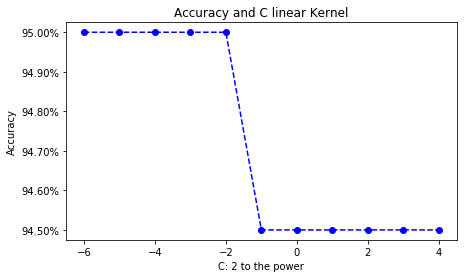

In [13]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

plt.plot(range(-6,5),accuracy,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Accuracy and C linear Kernel')
plt.xlabel('C: 2 to the power')
plt.ylabel('Accuracy')



# (b)

In [14]:
SVM=svm.SVC(kernel='linear',C=2**(-6),probability=True)
SVM.fit(twogaussians_x_train,twogaussians_y_train)
x_test_pred=SVM.predict(twogaussians_x_test)
error_twogaussian_svm=sum(x_test_pred!=twogaussians_y_test)/len(twogaussians_y_test)

In [15]:
lda=LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(twogaussians_x_train,twogaussians_y_train)
#x_train_LDA=lda.transform(x_train_transformed_95)
x_test_LDA=lda.transform(twogaussians_x_test)
x_test_pred=lda.predict(twogaussians_x_test)
error_twogaussian_lda=sum(x_test_pred!=twogaussians_y_test)/len(twogaussians_y_test)

In [16]:
lg=LogisticRegression()
lg.fit(twogaussians_x_train,twogaussians_y_train)
#x_train_LDA=lda.transform(x_train_transformed_95)
#x_test_LDA=lda.transform(twogaussians_x_test)
x_test_pred=lg.predict(twogaussians_x_test)
error_twogaussian_lg=sum(x_test_pred!=twogaussians_y_test)/len(twogaussians_y_test)

In [17]:
data={'Error':[error_twogaussian_lda,error_twogaussian_lg,error_twogaussian_svm]}

In [18]:
df=pd.DataFrame(data, index=['LDA','Logistic Regression','SVM'], columns=['Error'])

In [19]:
df['Error'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df['Error']], index = df.index)

In [20]:
df

,Error
LDA,10.00%
Logistic Regression,7.00%
SVM,8.00%


In [21]:
from scipy import linalg
import numpy as np
import pylab as pl
import matplotlib as mpl

In [22]:
xx, yy = np.meshgrid(np.linspace(-4, 4, 200), np.linspace(-4, 4, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
zz_lda = lda.predict_proba(X_grid)[:,1].reshape(xx.shape)
zz_lg = lg.predict_proba(X_grid)[:,1].reshape(xx.shape)
zz_svm=SVM.predict_proba(X_grid)[:,1].reshape(xx.shape)

Text(0.5,1,'Decision boundary for LDA,Logistic Regression and SVM')

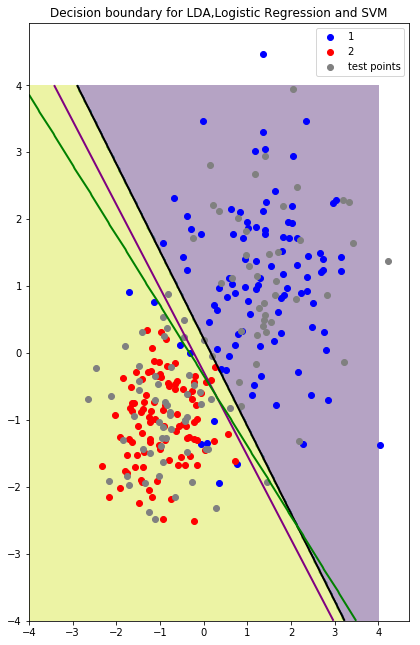

In [23]:
pl.figure(1, (15,11))
splot = pl.subplot(1, 2, 1)
pl.contourf(xx, yy, zz_lda > 0.5, alpha=0.4)
pl.scatter(twogaussians_x_train[twogaussians_y_train==1,0], twogaussians_x_train[twogaussians_y_train==1,1], c='b', label='1')
pl.scatter(twogaussians_x_train[twogaussians_y_train==2,0], twogaussians_x_train[twogaussians_y_train==2,1], c='r', label='2')
pl.scatter(twogaussians_x_test[:,0], twogaussians_x_test[:,1], c='grey', label='test points')
pl.contour(xx, yy, zz_lda, [0.5], linewidths=2., colors='black')
pl.contour(xx, yy, zz_lg, [0.5], linewidths=2., colors='purple')
pl.contour(xx, yy, zz_svm, [0.5], linewidths=2., colors='green')
#plot_ellipse(splot, lda.means_[0], lda.covariance_, 'b')
#plot_ellipse(splot, lda.means_[1], lda.covariance_, 'r')
pl.legend()
pl.axis('tight')
pl.title('Decision boundary for LDA,Logistic Regression and SVM')

# Problem 2

In [24]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# (a)

In [25]:
cv_error_p=[] 
for c in ([2**i for i in range(-6,5)]):
    SVM=svm.SVC(C=c,kernel='poly',degree=2,gamma=1,coef0=1)
    scores=1-cross_val_score(SVM,twogaussians_x_train,twogaussians_y_train,cv=5,scoring='accuracy')
    cv_error_p.append(scores.mean())
print(cv_error_p)

[0.05500000000000001, 0.05500000000000001, 0.045, 0.05, 0.05, 0.05, 0.039999999999999994, 0.045, 0.045, 0.05, 0.05]


In [26]:
accuracy_p = list(map(lambda x: 1-x, cv_error_p))

In [27]:
accuracy_p

[0.945, 0.945, 0.955, 0.95, 0.95, 0.95, 0.96, 0.955, 0.955, 0.95, 0.95]

Text(0,0.5,'Accuracy')

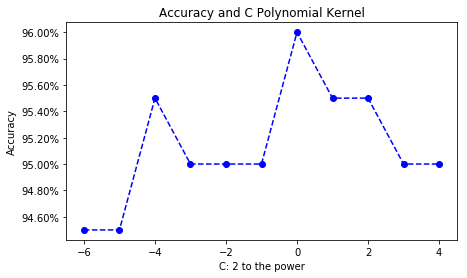

In [28]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

plt.plot(range(-6,5),accuracy_p,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Accuracy and C Polynomial Kernel')
plt.xlabel('C: 2 to the power')
plt.ylabel('Accuracy')

# (b)

In [29]:
qda=QuadraticDiscriminantAnalysis(store_covariance=True)
x_test_pred=qda.fit(twogaussians_x_train,twogaussians_y_train).predict(twogaussians_x_test)
#x_train_LDA=lda.transform(x_train_transformed_95)
#x_test_QDA=qda.transform(x_test_transformed_95)
#x_test_pred=qda.predict(x_test_transformed_95)
error_twogaussian_qda=sum(x_test_pred!=twogaussians_y_test)/len(twogaussians_y_test)

In [30]:
SVM=svm.SVC(kernel='poly',C=2**(3),probability=True,degree=2,gamma=1,coef0=1)
SVM.fit(twogaussians_x_train,twogaussians_y_train)
x_test_pred=SVM.predict(twogaussians_x_test)
error_twogaussian_svm_p=sum(x_test_pred!=twogaussians_y_test)/len(twogaussians_y_test)

In [31]:
error_twogaussian_svm_p

0.06

In [32]:
data={'Error':[error_twogaussian_qda,error_twogaussian_lg,error_twogaussian_svm_p]}

In [33]:
df=pd.DataFrame(data, index=['QDA','Logistic Regression','SVM'], columns=['Error'])

In [34]:
df['Error'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df['Error']], index = df.index)

In [35]:
df

,Error
QDA,7.00%
Logistic Regression,7.00%
SVM,6.00%


In [36]:
xx, yy = np.meshgrid(np.linspace(-4, 4, 200), np.linspace(-4, 4, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
zz_qda = qda.predict_proba(X_grid)[:,1].reshape(xx.shape)
zz_lg = lg.predict_proba(X_grid)[:,1].reshape(xx.shape)
zz_svm=SVM.predict_proba(X_grid)[:,1].reshape(xx.shape)

Text(0.5,1,'Decision boundary for LDA,Logistic Regression and SVM')

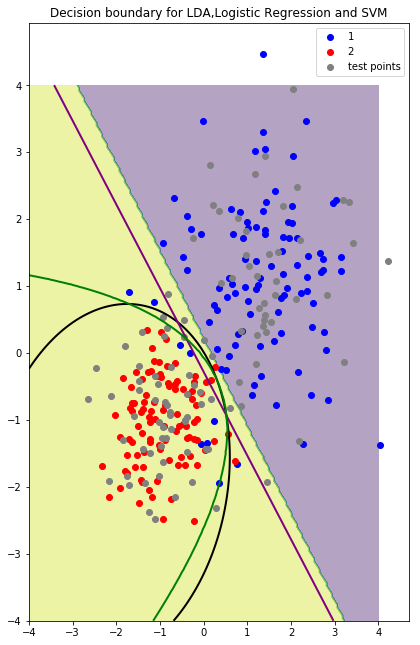

In [37]:
pl.figure(1, (15,11))
splot = pl.subplot(1, 2, 1)
pl.contourf(xx, yy, zz_lda > 0.5, alpha=0.4)
pl.scatter(twogaussians_x_train[twogaussians_y_train==1,0], twogaussians_x_train[twogaussians_y_train==1,1], c='b', label='1')
pl.scatter(twogaussians_x_train[twogaussians_y_train==2,0], twogaussians_x_train[twogaussians_y_train==2,1], c='r', label='2')
pl.scatter(twogaussians_x_test[:,0], twogaussians_x_test[:,1], c='grey', label='test points')
pl.contour(xx, yy, zz_qda, [0.5], linewidths=2., colors='black')
pl.contour(xx, yy, zz_lg, [0.5], linewidths=2., colors='purple')
pl.contour(xx, yy, zz_svm, [0.5], linewidths=2., colors='green')
#plot_ellipse(splot, lda.means_[0], lda.covariance_, 'b')
#plot_ellipse(splot, lda.means_[1], lda.covariance_, 'r')
pl.legend()
pl.axis('tight')
pl.title('Decision boundary for LDA,Logistic Regression and SVM')

# Problem 3

In [38]:
train = np.loadtxt('zip.train')
test  = np.loadtxt('zip.test')

In [39]:
y_train=train[:,0]
x_train=train[:,1:]
y_test=test[:,0]
x_test=test[:,1:]

In [40]:
x_train01=x_train[np.where((y_train==0)|(y_train==1))]
x_train17=x_train[np.where((y_train==7)|(y_train==1))]
x_train49=x_train[np.where((y_train==4)|(y_train==9))]
x_train358=x_train[np.where((y_train==3)|(y_train==5)|(y_train==8))]

x_test01=x_test[np.where((y_test==0)|(y_test==1))]
x_test17=x_test[np.where((y_test==7)|(y_test==1))]
x_test49=x_test[np.where((y_test==4)|(y_test==9))]
x_test358=x_test[np.where((y_test==3)|(y_test==5)|(y_test==8))]



y_train01=y_train[np.where((y_train==0)|(y_train==1))]
y_train17=y_train[np.where((y_train==7)|(y_train==1))]
y_train49=y_train[np.where((y_train==4)|(y_train==9))]
y_train358=y_train[np.where((y_train==3)|(y_train==5)|(y_train==8))]


y_test01=y_test[np.where((y_test==0)|(y_test==1))]
y_test17=y_test[np.where((y_test==7)|(y_test==1))]
y_test49=y_test[np.where((y_test==4)|(y_test==9))]
y_test358=y_test[np.where((y_test==3)|(y_test==5)|(y_test==8))]

# 0 and 1

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca95 = PCA(0.95)
pca95.fit(x_train01)
x_train_transformed_95 = pca95.transform(x_train01)
x_test_transformed_95=pca95.transform(x_test01)

In [43]:
cv_error_l_01=[] 
for c in ([2**i for i in range(-6,5)]):
    SVM=svm.SVC(kernel='linear',C=c)
    SVM.fit(x_train_transformed_95,y_train01)
    x_test_pred=SVM.predict(x_test_transformed_95)
    error_twogaussian_svm_p=sum(x_test_pred!=y_test01)/len(y_test01)
    cv_error_l_01.append(error_twogaussian_svm_p)
print(cv_error_l_01)

[0.006420545746388443, 0.006420545746388443, 0.006420545746388443, 0.006420545746388443, 0.006420545746388443, 0.006420545746388443, 0.006420545746388443, 0.006420545746388443, 0.006420545746388443, 0.006420545746388443, 0.006420545746388443]


In [44]:
cv_error_qp_01=[] 
for c in ([2**i for i in range(-6,5)]):
    SVM=svm.SVC(kernel='poly',C=c,degree=2,coef0=1,gamma=1)
    SVM.fit(x_train_transformed_95,y_train01)
    x_test_pred=SVM.predict(x_test_transformed_95)
    error_twogaussian_svm_p=sum(x_test_pred!=y_test01)/len(y_test01)
    cv_error_qp_01.append(error_twogaussian_svm_p)
print(cv_error_qp_01)

[0.004815409309791332, 0.004815409309791332, 0.004815409309791332, 0.004815409309791332, 0.004815409309791332, 0.004815409309791332, 0.004815409309791332, 0.004815409309791332, 0.004815409309791332, 0.004815409309791332, 0.004815409309791332]


In [45]:
cv_error_cp_01=[] 
for c in ([2**i for i in range(-6,5)]):
    SVM=svm.SVC(kernel='poly',C=c,degree=3,coef0=1,gamma=1)
    SVM.fit(x_train_transformed_95,y_train01)
    x_test_pred=SVM.predict(x_test_transformed_95)
    error_twogaussian_svm_p=sum(x_test_pred!=y_test01)/len(y_test01)
    cv_error_cp_01.append(error_twogaussian_svm_p)
print(cv_error_cp_01)

[0.004815409309791332, 0.004815409309791332, 0.004815409309791332, 0.004815409309791332, 0.004815409309791332, 0.004815409309791332, 0.004815409309791332, 0.004815409309791332, 0.004815409309791332, 0.004815409309791332, 0.004815409309791332]


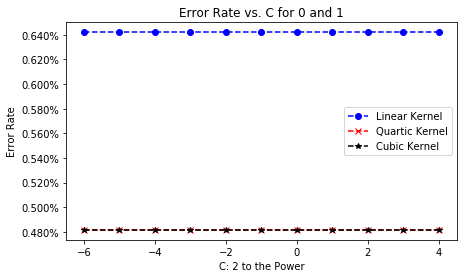

In [46]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

linear_kernel_g,=plt.plot(range(-6,5),cv_error_l_01,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)
q_kernel_g,=plt.plot(range(-6,5),cv_error_qp_01,color='red',linestyle='dashed',marker='x',
        markerfacecolor='red',markersize=6)
c_kernel_g,=plt.plot(range(-6,5),cv_error_cp_01,color='black',linestyle='dashed',marker='*',
        markerfacecolor='black',markersize=6)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Error Rate vs. C for 0 and 1')
plt.xlabel('C: 2 to the Power')
plt.ylabel('Error Rate')

plt.legend([linear_kernel_g,q_kernel_g,c_kernel_g],["Linear Kernel","Quartic Kernel","Cubic Kernel"])

# 1 and 7

In [47]:
pca95 = PCA(0.95)
pca95.fit(x_train17)
x_train_transformed_95 = pca95.transform(x_train17)
x_test_transformed_95=pca95.transform(x_test17)

In [48]:
cv_error_l_17=[] 
for c in ([2**i for i in range(-6,5)]):
    SVM=svm.SVC(kernel='linear',C=c)
    SVM.fit(x_train_transformed_95,y_train17)
    x_test_pred=SVM.predict(x_test_transformed_95)
    error_twogaussian_svm_p=sum(x_test_pred!=y_test17)/len(y_test17)
    cv_error_l_17.append(error_twogaussian_svm_p)
print(cv_error_l_17)

[0.009732360097323601, 0.009732360097323601, 0.009732360097323601, 0.009732360097323601, 0.009732360097323601, 0.009732360097323601, 0.009732360097323601, 0.009732360097323601, 0.009732360097323601, 0.009732360097323601, 0.009732360097323601]


In [49]:
cv_error_qp_17=[] 
for c in ([2**i for i in range(-6,5)]):
    SVM=svm.SVC(kernel='poly',C=c,degree=2,gamma=1,coef0=1)
    SVM.fit(x_train_transformed_95,y_train17)
    x_test_pred=SVM.predict(x_test_transformed_95)
    error_twogaussian_svm_p=sum(x_test_pred!=y_test17)/len(y_test17)
    cv_error_qp_17.append(error_twogaussian_svm_p)
print(cv_error_qp_17)

[0.014598540145985401, 0.014598540145985401, 0.014598540145985401, 0.014598540145985401, 0.014598540145985401, 0.014598540145985401, 0.014598540145985401, 0.014598540145985401, 0.014598540145985401, 0.014598540145985401, 0.014598540145985401]


In [50]:
cv_error_cp_17=[] 
for c in ([2**i for i in range(-6,5)]):
    SVM=svm.SVC(kernel='poly',C=c,degree=3,gamma=1,coef0=1)
    SVM.fit(x_train_transformed_95,y_train17)
    x_test_pred=SVM.predict(x_test_transformed_95)
    error_twogaussian_svm_p=sum(x_test_pred!=y_test17)/len(y_test17)
    cv_error_cp_17.append(error_twogaussian_svm_p)
print(cv_error_cp_17)

[0.012165450121654502, 0.012165450121654502, 0.012165450121654502, 0.012165450121654502, 0.012165450121654502, 0.012165450121654502, 0.012165450121654502, 0.012165450121654502, 0.012165450121654502, 0.012165450121654502, 0.012165450121654502]


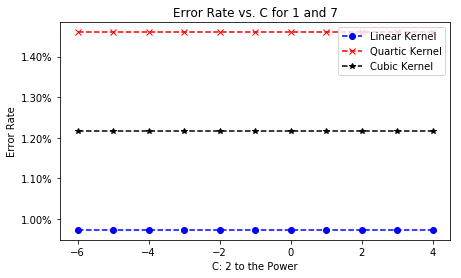

In [51]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

linear_kernel_g,=plt.plot(range(-6,5),cv_error_l_17,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)
q_kernel_g,=plt.plot(range(-6,5),cv_error_qp_17,color='red',linestyle='dashed',marker='x',
        markerfacecolor='red',markersize=6)
c_kernel_g,=plt.plot(range(-6,5),cv_error_cp_17,color='black',linestyle='dashed',marker='*',
        markerfacecolor='black',markersize=6)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Error Rate vs. C for 1 and 7')
plt.xlabel('C: 2 to the Power')
plt.ylabel('Error Rate')

plt.legend([linear_kernel_g,q_kernel_g,c_kernel_g],["Linear Kernel","Quartic Kernel","Cubic Kernel"])

# 4 and 9 

In [52]:
pca95 = PCA(0.95)
pca95.fit(x_train49)
x_train_transformed_95 = pca95.transform(x_train49)
x_test_transformed_95=pca95.transform(x_test49)

In [53]:
cv_error_l_49=[] 
for c in ([2**i for i in range(-6,5)]):
    SVM=svm.SVC(kernel='linear',C=c)
    SVM.fit(x_train_transformed_95,y_train49)
    x_test_pred=SVM.predict(x_test_transformed_95)
    error_twogaussian_svm_p=sum(x_test_pred!=y_test49)/len(y_test49)
    cv_error_l_49.append(error_twogaussian_svm_p)
print(cv_error_l_49)

[0.03713527851458886, 0.03183023872679045, 0.03183023872679045, 0.029177718832891247, 0.03713527851458886, 0.034482758620689655, 0.03713527851458886, 0.03713527851458886, 0.03713527851458886, 0.03713527851458886, 0.03713527851458886]


In [54]:
cv_error_qp_49=[] 
for c in ([2**i for i in range(-6,5)]):
    SVM=svm.SVC(kernel='poly',C=c,degree=2,gamma=1,coef0=1)
    SVM.fit(x_train_transformed_95,y_train49)
    x_test_pred=SVM.predict(x_test_transformed_95)
    error_twogaussian_svm_p=sum(x_test_pred!=y_test49)/len(y_test49)
    cv_error_qp_49.append(error_twogaussian_svm_p)
print(cv_error_qp_49)

[0.021220159151193633, 0.021220159151193633, 0.021220159151193633, 0.021220159151193633, 0.021220159151193633, 0.021220159151193633, 0.021220159151193633, 0.021220159151193633, 0.021220159151193633, 0.021220159151193633, 0.021220159151193633]


In [55]:
cv_error_cp_49=[] 
for c in ([2**i for i in range(-6,5)]):
    SVM=svm.SVC(kernel='poly',C=c,degree=3,gamma=1,coef0=1)
    SVM.fit(x_train_transformed_95,y_train49)
    x_test_pred=SVM.predict(x_test_transformed_95)
    error_twogaussian_svm_p=sum(x_test_pred!=y_test49)/len(y_test49)
    cv_error_cp_49.append(error_twogaussian_svm_p)
print(cv_error_cp_49)

[0.029177718832891247, 0.029177718832891247, 0.029177718832891247, 0.029177718832891247, 0.029177718832891247, 0.029177718832891247, 0.029177718832891247, 0.029177718832891247, 0.029177718832891247, 0.029177718832891247, 0.029177718832891247]


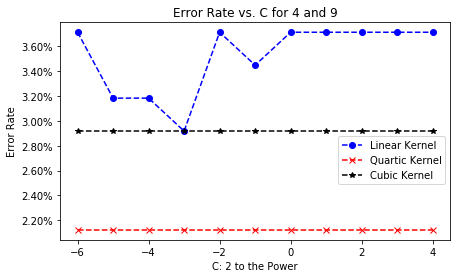

In [56]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

linear_kernel_g,=plt.plot(range(-6,5),cv_error_l_49,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)
q_kernel_g,=plt.plot(range(-6,5),cv_error_qp_49,color='red',linestyle='dashed',marker='x',
        markerfacecolor='red',markersize=6)
c_kernel_g,=plt.plot(range(-6,5),cv_error_cp_49,color='black',linestyle='dashed',marker='*',
        markerfacecolor='black',markersize=6)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Error Rate vs. C for 4 and 9')
plt.xlabel('C: 2 to the Power')
plt.ylabel('Error Rate')

plt.legend([linear_kernel_g,q_kernel_g,c_kernel_g],["Linear Kernel","Quartic Kernel","Cubic Kernel"],bbox_to_anchor=(1, 0.5))

# Problem 4

# 0 and 1

In [57]:
pca95 = PCA(0.95)
pca95.fit(x_train01)
x_train_transformed_95 = pca95.transform(x_train01)
x_test_transformed_95=pca95.transform(x_test01)

In [58]:
test_error_01=[] 
for c in ([2**i for i in range(-6,5)]):
    for g in ([2**j for j in range(-8,3)]):
        SVM=svm.SVC(kernel='rbf',C=c,gamma=g)
        SVM.fit(x_train_transformed_95,y_train01)
        x_test_pred=SVM.predict(x_test_transformed_95)
        error_twogaussian_svm_p=sum(x_test_pred!=y_test01)/len(y_test01)
        test_error_01.append(error_twogaussian_svm_p)
print(test_error_01)

[0.004815409309791332, 0.006420545746388443, 0.012841091492776886, 0.033707865168539325, 0.056179775280898875, 0.1332263242375602, 0.2536115569823435, 0.4044943820224719, 0.42375601926163725, 0.42375601926163725, 0.42375601926163725, 0.004815409309791332, 0.008025682182985553, 0.011235955056179775, 0.027287319422150885, 0.048154093097913325, 0.08507223113964688, 0.18298555377207062, 0.31781701444622795, 0.42375601926163725, 0.42375601926163725, 0.42375601926163725, 0.006420545746388443, 0.008025682182985553, 0.008025682182985553, 0.02247191011235955, 0.03691813804173355, 0.06260032102728733, 0.12359550561797752, 0.26324237560192615, 0.38041733547351525, 0.42375601926163725, 0.42375601926163725, 0.008025682182985553, 0.008025682182985553, 0.008025682182985553, 0.019261637239165328, 0.03210272873194221, 0.04975922953451043, 0.09470304975922954, 0.1942215088282504, 0.32102728731942215, 0.42375601926163725, 0.42375601926163725, 0.008025682182985553, 0.008025682182985553, 0.0064205457463884

In [59]:
z=np.array(test_error_01)
x=np.arange(-6,5)
y=np.arange(-6,5)

In [60]:
for i in range(-8,3):
    print(i)

-8
-7
-6
-5
-4
-3
-2
-1
0
1
2


In [61]:
z=np.reshape(z,(11,11))

In [62]:
binsx=np.arange(8,3)
binsy=np.arange(-6,4)

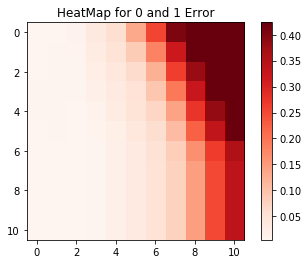

In [63]:
plt.imshow(z, cmap=plt.cm.Reds)
plt.title('HeatMap for 0 and 1 Error')
#plt.xticks(binsx)
#plt.yticks(binsy)
plt.colorbar()
plt.show()

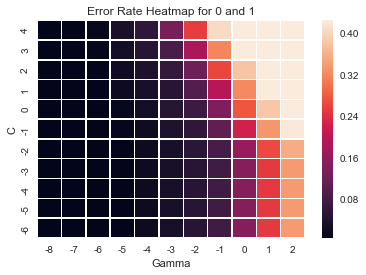

In [64]:

import seaborn as sns

sns.set()
#uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(z, linewidth=0.5)
ax.set_xticklabels(['-8','-7','-6','-5','-4','-3','-2','-1','0','1','2'])
#ax.set_yticklabels(['-6','-5','-4','-3','-2','-1','0','1','2','3','4'])
ax.set_yticklabels(['4','3','2','1','0','-1','-2','-3','-4','-5','-6'])
ax.set_xlabel('Gamma')
ax.set_ylabel('C')
ax.set_title('Error Rate Heatmap for 0 and 1')
plt.show()

In [65]:
np.min(z)

0.004815409309791332

In [66]:
df=pd.DataFrame(z,columns=['-8','-7','-6','-5','-4','-3','-2','-1','0','1','2'],index=['-6','-5','-4','-3','-2','-1','0','1','2','3','4'])

In [67]:
df=df*100

In [68]:
pd.options.display.float_format = "{0:.4f}%".format

In [69]:
df

,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2
-6,0.4815%,0.6421%,1.2841%,3.3708%,5.6180%,13.3226%,25.3612%,40.4494%,42.3756%,42.3756%,42.3756%
-5,0.4815%,0.8026%,1.1236%,2.7287%,4.8154%,8.5072%,18.2986%,31.7817%,42.3756%,42.3756%,42.3756%
-4,0.6421%,0.8026%,0.8026%,2.2472%,3.6918%,6.2600%,12.3596%,26.3242%,38.0417%,42.3756%,42.3756%
-3,0.8026%,0.8026%,0.8026%,1.9262%,3.2103%,4.9759%,9.4703%,19.4222%,32.1027%,42.3756%,42.3756%
-2,0.8026%,0.8026%,0.6421%,1.2841%,2.7287%,4.8154%,7.0626%,13.9647%,27.6083%,38.3628%,42.3756%
-1,0.6421%,0.8026%,0.6421%,1.1236%,2.0867%,3.8523%,5.7785%,10.9149%,22.3114%,33.2263%,41.8941%
0,0.6421%,0.4815%,0.4815%,0.8026%,1.9262%,3.2103%,5.1364%,8.1862%,16.3724%,26.6453%,35.6340%
1,0.6421%,0.4815%,0.4815%,0.8026%,1.9262%,3.2103%,4.9759%,7.5441%,14.6067%,25.0401%,33.7079%
2,0.4815%,0.4815%,0.4815%,0.8026%,1.9262%,3.2103%,4.9759%,7.5441%,14.6067%,25.0401%,33.7079%
3,0.4815%,0.4815%,0.4815%,0.8026%,1.9262%,3.2103%,4.9759%,7.5441%,14.6067%,25.0401%,33.7079%


In [70]:
np.unravel_index(z.argmin(), z.shape)

(0, 0)

In [71]:
min(test_error_01)

0.004815409309791332

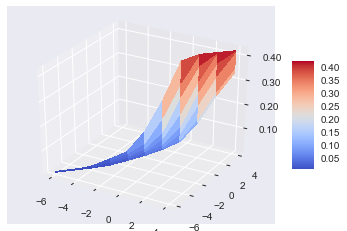

In [72]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')



# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# 1 and 7 

In [73]:
pca95 = PCA(0.95)
pca95.fit(x_train17)
x_train_transformed_95 = pca95.transform(x_train17)
x_test_transformed_95=pca95.transform(x_test17)

In [74]:
test_error_17=[] 
for c in ([2**i for i in range(-6,5)]):
    for g in ([2**j for j in range(-8,3)]):
        SVM=svm.SVC(kernel='rbf',C=c,gamma=g)
        SVM.fit(x_train_transformed_95,y_train17)
        x_test_pred=SVM.predict(x_test_transformed_95)
        error_twogaussian_svm_p=sum(x_test_pred!=y_test17)/len(y_test17)
        test_error_17.append(error_twogaussian_svm_p)
print(test_error_17)

[0.014598540145985401, 0.012165450121654502, 0.019464720194647202, 0.043795620437956206, 0.0851581508515815, 0.06082725060827251, 0.35766423357664234, 0.35766423357664234, 0.35766423357664234, 0.35766423357664234, 0.35766423357664234, 0.014598540145985401, 0.014598540145985401, 0.021897810218978103, 0.038929440389294405, 0.072992700729927, 0.13138686131386862, 0.35766423357664234, 0.35766423357664234, 0.35766423357664234, 0.35766423357664234, 0.35766423357664234, 0.014598540145985401, 0.014598540145985401, 0.0170316301703163, 0.0340632603406326, 0.058394160583941604, 0.0948905109489051, 0.12652068126520682, 0.35766423357664234, 0.35766423357664234, 0.35766423357664234, 0.35766423357664234, 0.014598540145985401, 0.012165450121654502, 0.014598540145985401, 0.031630170316301706, 0.051094890510948905, 0.08029197080291971, 0.15571776155717762, 0.35766423357664234, 0.35766423357664234, 0.35766423357664234, 0.35766423357664234, 0.009732360097323601, 0.009732360097323601, 0.012165450121654502,

In [75]:
z=np.array(test_error_17)
z=np.reshape(z,(11,11))

In [76]:
np.min(z)

0.0072992700729927005

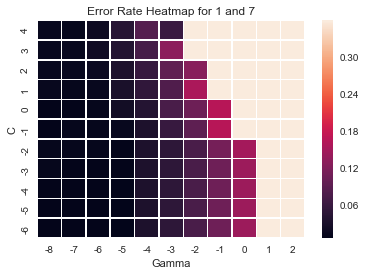

In [77]:
import seaborn as sns

sns.set()
#uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(z, linewidth=0.5)
ax.set_xticklabels(['-8','-7','-6','-5','-4','-3','-2','-1','0','1','2'])
#ax.set_yticklabels(['-6','-5','-4','-3','-2','-1','0','1','2','3','4'])
ax.set_yticklabels(['4','3','2','1','0','-1','-2','-3','-4','-5','-6'])
ax.set_xlabel('Gamma')
ax.set_ylabel('C')
ax.set_title('Error Rate Heatmap for 1 and 7')
plt.show()

In [78]:
df=pd.DataFrame(z,columns=['-8','-7','-6','-5','-4','-3','-2','-1','0','1','2'],index=['-6','-5','-4','-3','-2','-1','0','1','2','3','4'])

In [79]:
df=df*100

In [80]:
pd.options.display.float_format = "{0:.4f}%".format

In [81]:
df

,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2
-6,1.4599%,1.2165%,1.9465%,4.3796%,8.5158%,6.0827%,35.7664%,35.7664%,35.7664%,35.7664%,35.7664%
-5,1.4599%,1.4599%,2.1898%,3.8929%,7.2993%,13.1387%,35.7664%,35.7664%,35.7664%,35.7664%,35.7664%
-4,1.4599%,1.4599%,1.7032%,3.4063%,5.8394%,9.4891%,12.6521%,35.7664%,35.7664%,35.7664%,35.7664%
-3,1.4599%,1.2165%,1.4599%,3.1630%,5.1095%,8.0292%,15.5718%,35.7664%,35.7664%,35.7664%,35.7664%
-2,0.9732%,0.9732%,1.2165%,2.4331%,4.1363%,7.5426%,10.4623%,16.5450%,35.7664%,35.7664%,35.7664%
-1,0.9732%,1.2165%,1.2165%,1.4599%,3.4063%,5.8394%,9.2457%,16.5450%,35.7664%,35.7664%,35.7664%
0,1.2165%,1.2165%,1.2165%,0.9732%,3.4063%,4.8662%,7.5426%,11.1922%,15.0852%,35.7664%,35.7664%
1,1.2165%,0.9732%,0.9732%,0.9732%,3.4063%,4.8662%,7.5426%,10.7056%,14.3552%,35.7664%,35.7664%
2,0.9732%,0.9732%,0.9732%,0.7299%,3.4063%,4.8662%,7.5426%,10.7056%,14.3552%,35.7664%,35.7664%
3,0.9732%,0.9732%,0.9732%,0.7299%,3.4063%,4.8662%,7.5426%,10.7056%,14.3552%,35.7664%,35.7664%


# 4 and 9

In [82]:
pca95 = PCA(0.95)
pca95.fit(x_train49)
x_train_transformed_95 = pca95.transform(x_train49)
x_test_transformed_95=pca95.transform(x_test49)

In [83]:
test_error_49=[] 
for c in ([2**i for i in range(-6,5)]):
    for g in ([2**j for j in range(-8,3)]):
        SVM=svm.SVC(kernel='rbf',C=c,gamma=g)
        SVM.fit(x_train_transformed_95,y_train49)
        x_test_pred=SVM.predict(x_test_transformed_95)
        error_twogaussian_svm_p=sum(x_test_pred!=y_test49)/len(y_test49)
        test_error_49.append(error_twogaussian_svm_p)
print(test_error_49)

[0.10610079575596817, 0.09018567639257294, 0.14058355437665782, 0.40848806366047746, 0.46949602122015915, 0.46949602122015915, 0.46949602122015915, 0.46949602122015915, 0.46949602122015915, 0.46949602122015915, 0.46949602122015915, 0.05570291777188329, 0.05570291777188329, 0.08222811671087533, 0.19363395225464192, 0.46949602122015915, 0.46949602122015915, 0.46949602122015915, 0.46949602122015915, 0.46949602122015915, 0.46949602122015915, 0.46949602122015915, 0.03183023872679045, 0.03713527851458886, 0.050397877984084884, 0.1220159151193634, 0.40583554376657827, 0.46949602122015915, 0.46949602122015915, 0.46949602122015915, 0.46949602122015915, 0.46949602122015915, 0.46949602122015915, 0.029177718832891247, 0.026525198938992044, 0.03183023872679045, 0.07957559681697612, 0.2572944297082228, 0.46949602122015915, 0.46949602122015915, 0.46949602122015915, 0.46949602122015915, 0.46949602122015915, 0.46949602122015915, 0.026525198938992044, 0.026525198938992044, 0.023872679045092837, 0.050397

In [84]:
z=np.array(test_error_49)
z=np.reshape(z,(11,11))

In [85]:
np.min(z)

0.021220159151193633

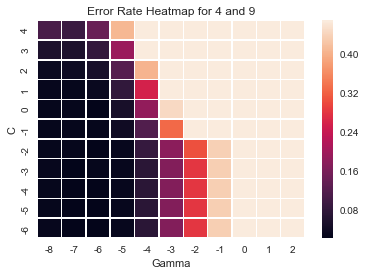

In [86]:
import seaborn as sns

sns.set()
#uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(z, linewidth=0.5)
ax.set_xticklabels(['-8','-7','-6','-5','-4','-3','-2','-1','0','1','2'])
#ax.set_yticklabels(['-6','-5','-4','-3','-2','-1','0','1','2','3','4'])
ax.set_yticklabels(['4','3','2','1','0','-1','-2','-3','-4','-5','-6'])
ax.set_xlabel('Gamma')
ax.set_ylabel('C')
ax.set_title('Error Rate Heatmap for 4 and 9')
plt.show()

In [87]:
df=pd.DataFrame(z,columns=['-8','-7','-6','-5','-4','-3','-2','-1','0','1','2'],index=['-6','-5','-4','-3','-2','-1','0','1','2','3','4'])

In [88]:
df=df*100

In [89]:
pd.options.display.float_format = "{0:.4f}%".format

In [90]:
df

,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2
-6,10.6101%,9.0186%,14.0584%,40.8488%,46.9496%,46.9496%,46.9496%,46.9496%,46.9496%,46.9496%,46.9496%
-5,5.5703%,5.5703%,8.2228%,19.3634%,46.9496%,46.9496%,46.9496%,46.9496%,46.9496%,46.9496%,46.9496%
-4,3.1830%,3.7135%,5.0398%,12.2016%,40.5836%,46.9496%,46.9496%,46.9496%,46.9496%,46.9496%,46.9496%
-3,2.9178%,2.6525%,3.1830%,7.9576%,25.7294%,46.9496%,46.9496%,46.9496%,46.9496%,46.9496%,46.9496%
-2,2.6525%,2.6525%,2.3873%,5.0398%,18.5676%,44.8276%,46.9496%,46.9496%,46.9496%,46.9496%,46.9496%
-1,2.6525%,2.6525%,2.6525%,3.9788%,11.6711%,32.8912%,46.9496%,46.9496%,46.9496%,46.9496%,46.9496%
0,2.6525%,2.6525%,2.3873%,2.9178%,8.4881%,17.7719%,30.5040%,43.7666%,46.9496%,46.9496%,46.9496%
1,2.9178%,2.1220%,2.6525%,2.9178%,7.1618%,16.9761%,28.1167%,43.5013%,46.9496%,46.9496%,46.9496%
2,2.6525%,2.3873%,2.3873%,2.9178%,7.1618%,16.9761%,28.1167%,43.5013%,46.9496%,46.9496%,46.9496%
3,2.6525%,2.3873%,2.3873%,2.9178%,7.1618%,16.9761%,28.1167%,43.5013%,46.9496%,46.9496%,46.9496%


In [91]:
np.min(z)

0.021220159151193633